In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

In [52]:
#import the file
data = pd.read_csv('cereal.csv')
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [54]:
from math import nan
data['potass'] = data['potass'].replace(-1, nan)

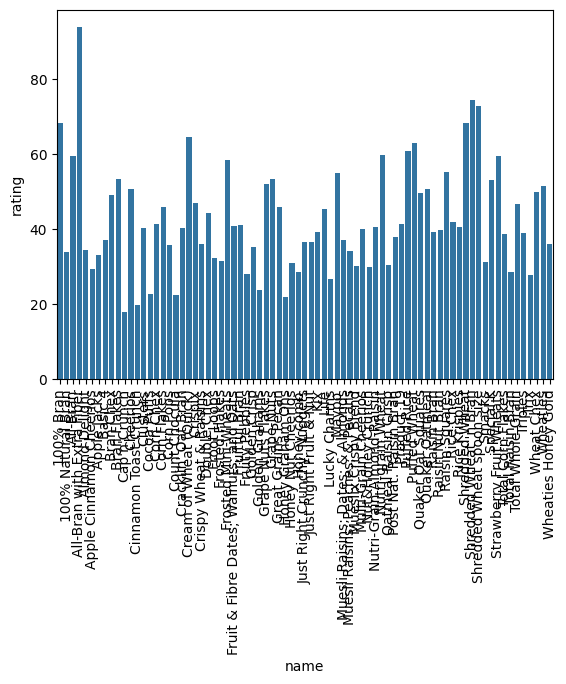

In [55]:
#let's plot graph between name and rating
sns.barplot(x = 'name', y = 'rating', data = data)
plt.xticks(rotation = 90)
plt.show()

In [24]:
x = data.drop(columns = ['rating'], axis = 1)
y = data['rating']

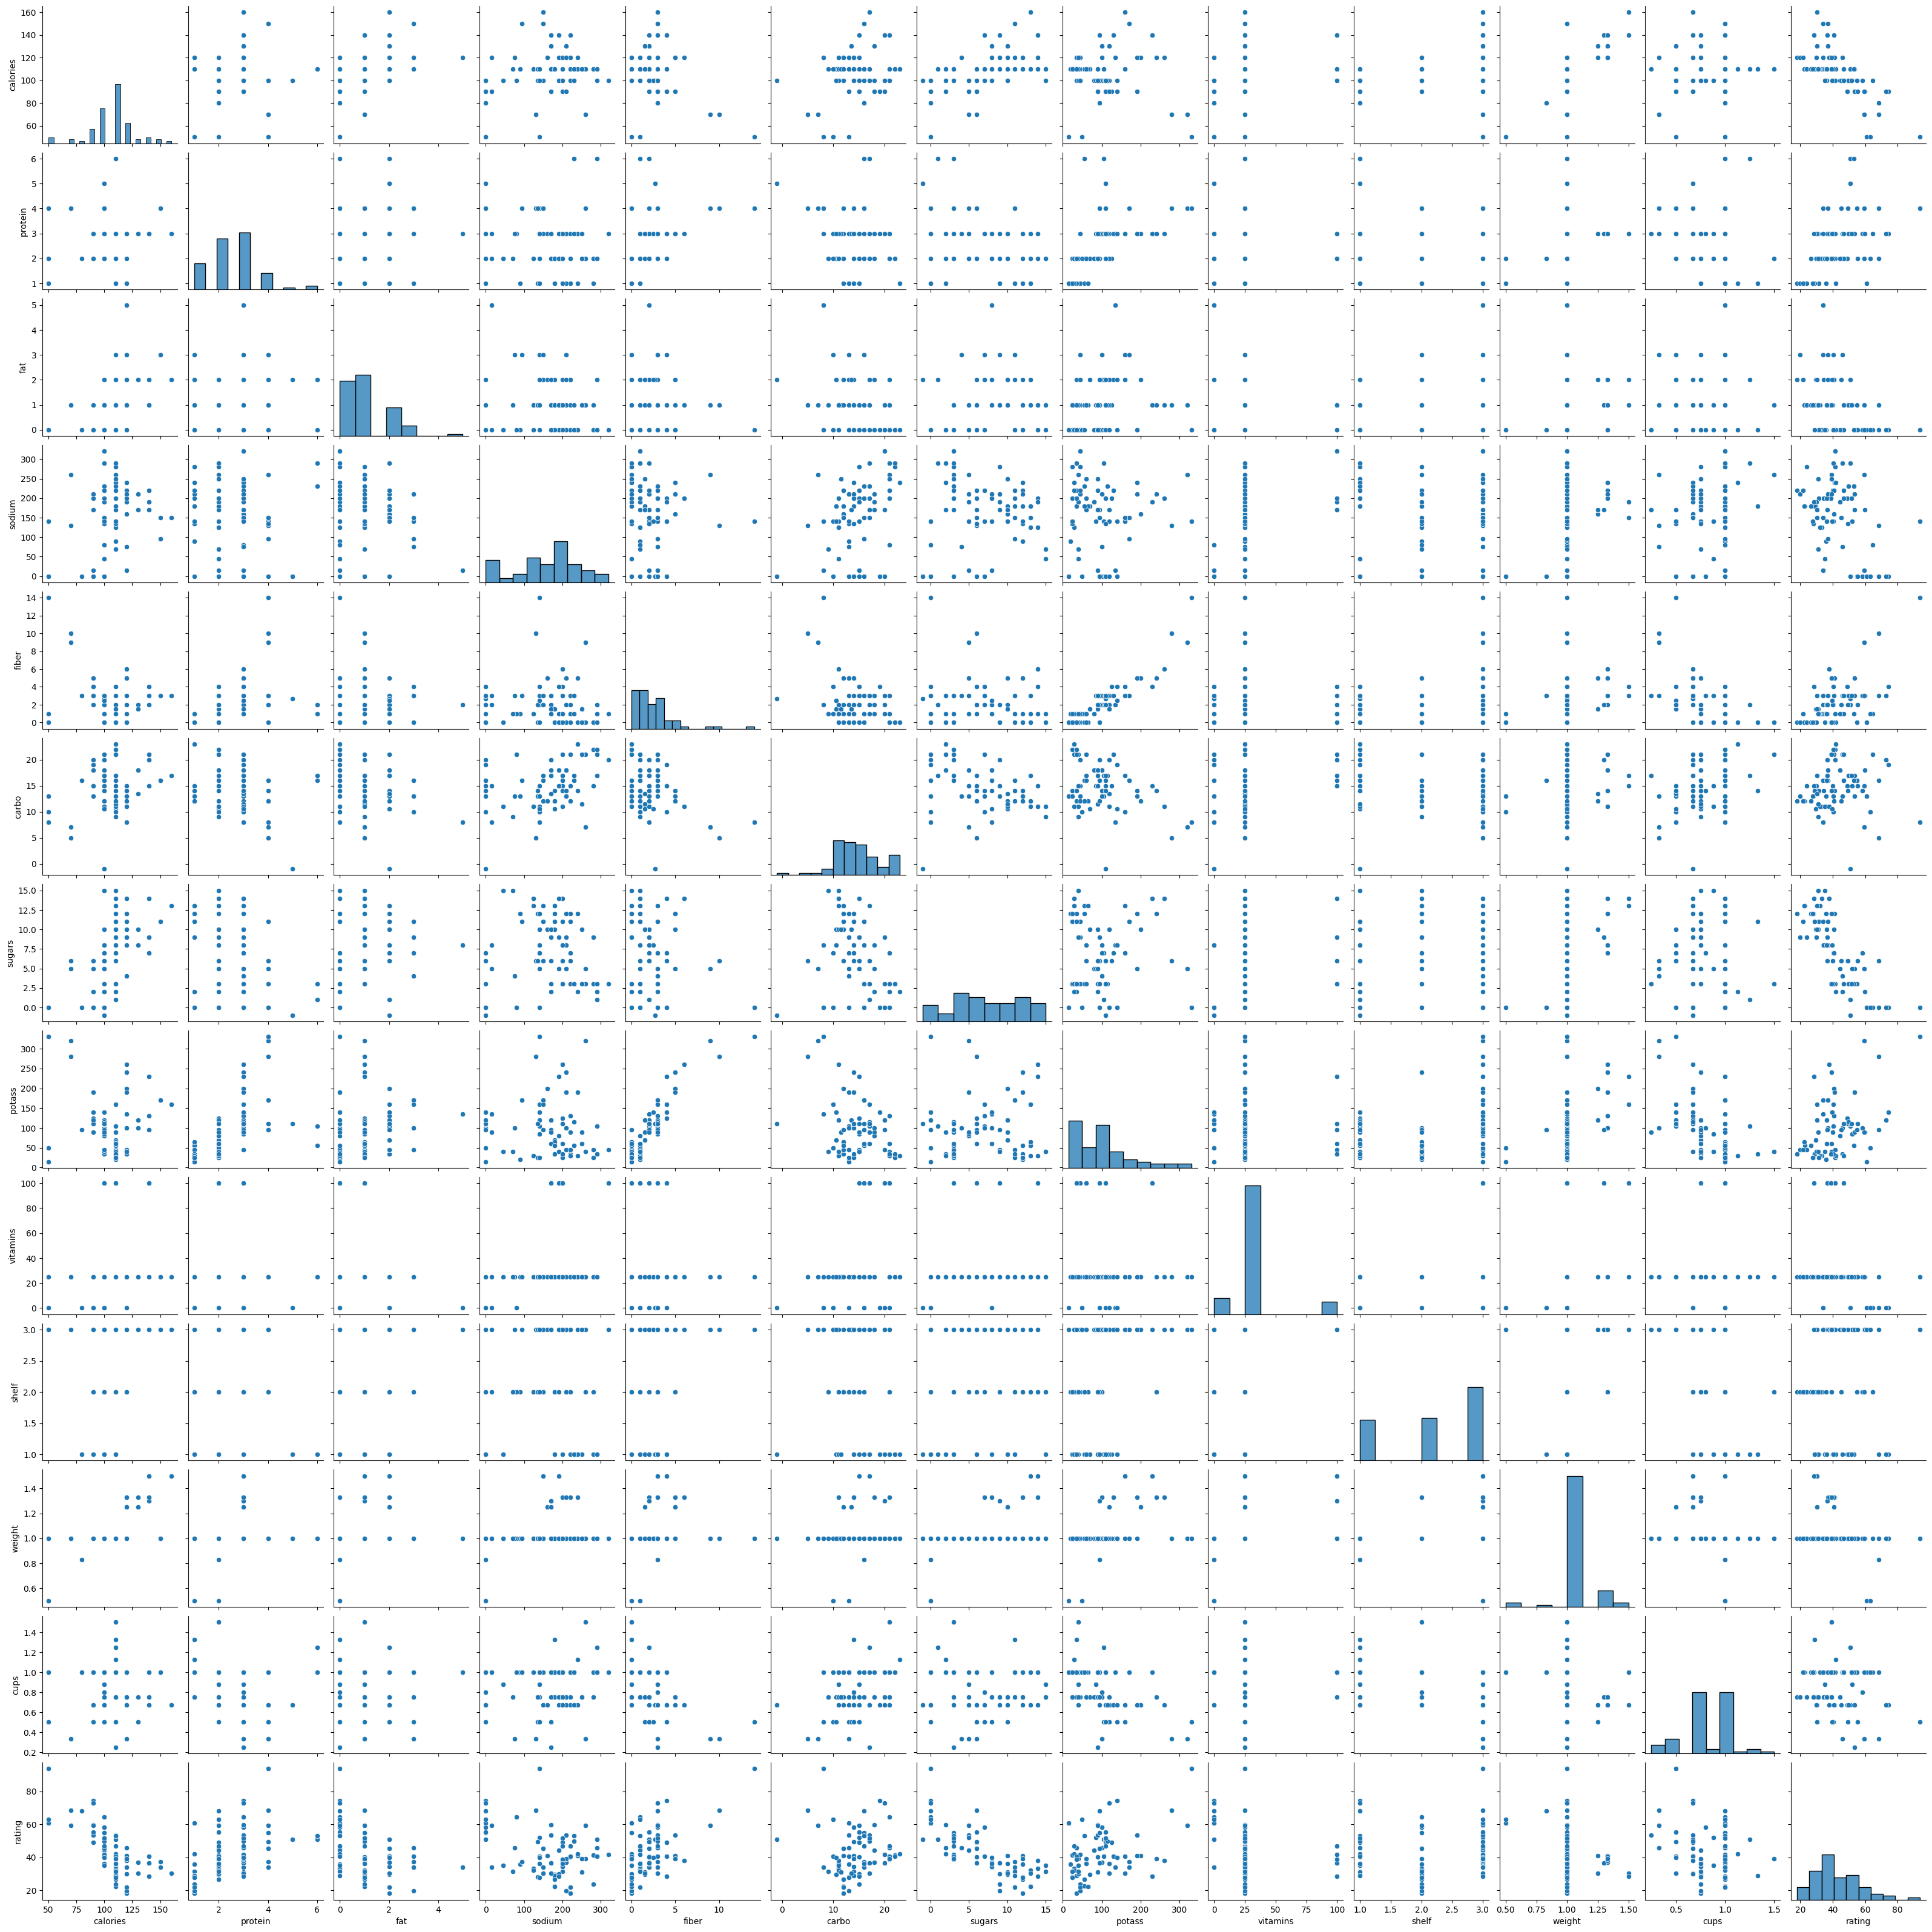

In [50]:
#graph of x amd y
sns.pairplot(data)
plt.show()

In [35]:
#trainig
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [37]:
#let's define the Linear regression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
#let'ws predict
y_pred = model.predict(x_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.5036010773486794
R2: 0.9973315247291769


In [44]:
#let's take an example
import numpy as np

new_data = np.array([[3, 100, 3, 0, 25, 3, 1, 110,14, 2, 1, 1, 0, 180, 3, 1.0, 0.33, 6, 3, 40, 3]])
new_data = new_data.reshape(1, -1)
prediction = model.predict(new_data)
print(f'Predicted rating: {prediction[0]}')

Predicted rating: 494.0372154051377
